<a href="https://colab.research.google.com/github/jansoe/AICA/blob/main/SuperBasicImageClassification_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A simple Artifical Neural Network

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

## The Data


Our toy data: The MNIST dastaset (handwritten digit recognition)

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# scaling the pixel values to the range (-1, 1) 
train_images = (train_images/255 - 0.5) * 2
test_images = (test_images/255 - 0.5) * 2

11490434/11490434 [==============================] - 2s 0us/step


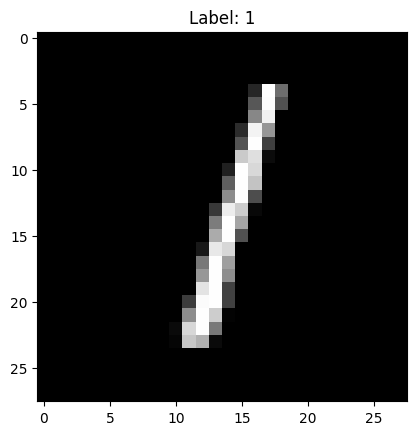

In [ ]:
_ = plt.imshow(test_images[2], cmap=plt.cm.gray)
_ = plt.title('Label: %s'%test_labels[2])

In [ ]:
train_images.shape

(60000, 28, 28)

The training data conatins 60.000 samples of handwritten digits. 
The data is inherently 2D (28x28 pixel).

For our first network we will create now a simple 1D-Vector by flattening the images and thus discarding the 2D neighbourhood structure.

In [ ]:
train_images_flat = train_images.reshape((-1, 28*28))
test_images_flat = test_images.reshape((-1, 28*28))

train_images_flat.shape

(60000, 784)

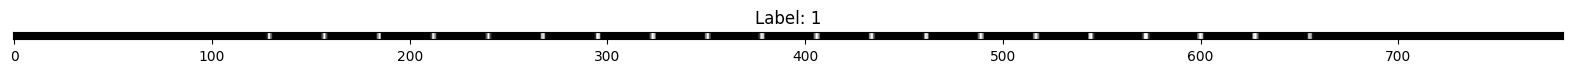

In [ ]:
plt.figure(figsize=(20,0.1))
_ = plt.imshow(test_images_flat[2].reshape(1, -1), cmap=plt.cm.gray, aspect='auto')
_ = plt.title('Label: %s'%test_labels[2])
_ = plt.yticks([])

## The most simple Network 

All features (pixel values) are mapped to probabilities for all 10 labels



In [ ]:
# A Dense Layer ist an all-to-all conection of input and output neurons
out_layer = tf.keras.layers.Dense(
    input_shape=(784,),             
    units=10,                      # output: 10 units for 10 categories
    activation='softmax',          # softmax-activation, so that probabilities sum up to 1
    name = 'probabilities'
)

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(out_layer)

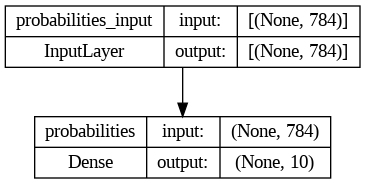

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 probabilities (Dense)       (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


For training the model we need to specify the loss to minimize, and the procedure to do this.

For our case of `multiclass-classification` we can use the loss of `categorical_crossentropy`, which measures how many bits of uncertainty are left to obtain the true labels given our prediction.

We use **sparse**`_categorical_crossentropy` because our labels are encoded sparse i.e. as integers 0,1,..,9 and not as binary **one-hot** labels: (1,0,0,0,0,0,0,0,0,0,0), (0,1,0,0,0,0,0,0,0,0,0), ...,  (0,0,0,0,0,0,0,0,0,0,1)

In [ ]:
model1.compile(
    loss = 'sparse_categorical_crossentropy', 
    optimizer = 'SGD',      # optimization procdure
    metrics = ['accuracy']  # Monitoring training
)

Now we can fit our data to the model

In [ ]:
history = model1.fit(
    x = train_images_flat, 
    y = train_labels,
    batch_size = 16,
    validation_data = (test_images_flat, test_labels),
    epochs = 20  # one epoche is one sweep through the training data
)

Epoch 1/20
3750/3750 [==============================] - 25s 5ms/step - loss: 0.4497 - accuracy: 0.8695 - val_loss: 0.3308 - val_accuracy: 0.9031
Epoch 2/20
3750/3750 [==============================] - 13s 3ms/step - loss: 0.3299 - accuracy: 0.9053 - val_loss: 0.3080 - val_accuracy: 0.9157
Epoch 3/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3108 - accuracy: 0.9100 - val_loss: 0.2983 - val_accuracy: 0.9148
Epoch 4/20
3750/3750 [==============================] - 12s 3ms/step - loss: 0.3008 - accuracy: 0.9133 - val_loss: 0.2960 - val_accuracy: 0.9127
Epoch 5/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2942 - accuracy: 0.9158 - val_loss: 0.2839 - val_accuracy: 0.9183
Epoch 6/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2896 - accuracy: 0.9178 - val_loss: 0.2844 - val_accuracy: 0.9200
Epoch 7/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.2862 - accuracy: 0.9185 - val_loss: 0.2866 - val_ac

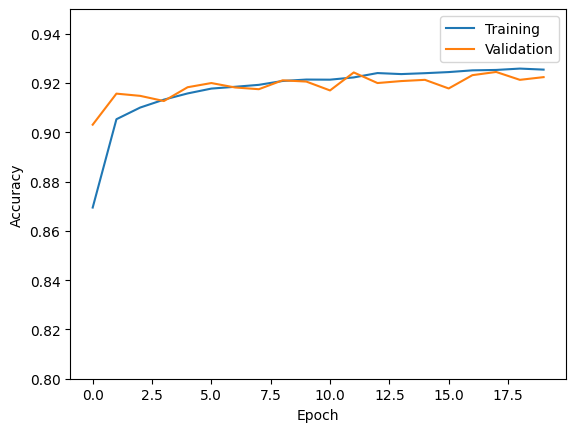

In [ ]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylim([.8, .95])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

## Getting Deeper  

Additional `hidden layers` increase complexity and thus expressiveness of the network.

In [ ]:
hidden_layer = tf.keras.layers.Dense( 
    input_shape = (28*28,), 
    units=200,            # 200 units als intermediate-output
    activation = 'relu',  # one of the most popular activation functions 
    name = 'hidden'
) 

In [ ]:
# unser outputlayer wie oben
out_layer = tf.keras.layers.Dense( 
    units=10,                      
    activation='softmax',  
    name= 'out'
)

In [ ]:
model2 = tf.keras.models.Sequential()

model2.add(hidden_layer)
model2.add(out_layer)

model2.compile(
    loss = 'sparse_categorical_crossentropy',  # Klassifizierungsfehler
    metrics = ['accuracy'],  # Anteil korrekt klassifizierter Samples des Validierungsdatensatzes
)

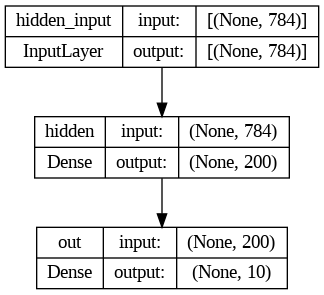

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 200)               157000    
                                                                 
 out (Dense)                 (None, 10)                2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model2.fit(
    x = train_images_flat, 
    y = train_labels,
    validation_data = (test_images_flat, test_labels),
    epochs = 20
)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3183 - accuracy: 0.9021 - val_loss: 0.1668 - val_accuracy: 0.9501
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1584 - accuracy: 0.9528 - val_loss: 0.1443 - val_accuracy: 0.9622
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1255 - accuracy: 0.9643 - val_loss: 0.1273 - val_accuracy: 0.9654
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1084 - accuracy: 0.9692 - val_loss: 0.1570 - val_accuracy: 0.9586
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1029 - accuracy: 0.9709 - val_loss: 0.1488 - val_accuracy: 0.9636
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0910 - accuracy: 0.9756 - val_loss: 0.1247 - val_accuracy: 0.9691
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9764 - val_loss: 0.1265 - val_accuracy:


### Experiments Suggestions
Observe the train and validation error 
- in/decrease the number of neurons in the `hidden layer` (getting wider)
- with a second `hidden layer 2` (getting deeper) 


## Convolutional Neural Networks (CNN)


![Förderprogramm LINK der Stiftung Niedersachsen - Aufgabensammlung 1](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/padding_strides.gif) https://github.com/vdumoulin/conv_arithmetic

Convolutional Neural Networks reflect the inherent 2D-structure of images.

Every convolution filter "looks" for a specific local feature in across the image 

In [ ]:
input_layer = tf.keras.layers.Conv2D(
    input_shape = (28, 28, 1),    # our input shape (1 colour channel)
    filters = 24,                 # how many filter/feature we want to learn
    kernel_size = (5,5),          # filtersize
    activation= 'relu',
    strides=2
)

hidden_convolution = tf.keras.layers.Conv2D(
    filters = 48,                  
    kernel_size = (5,5),
    activation= 'relu',
    strides=2
)

flatten_layer = tf.keras.layers.Flatten()

intermediate_layer = tf.keras.layers.Dense( 
    units = 256,
    activation = 'relu',
)

out_layer = tf.keras.layers.Dense( 
    units=10,                     
    activation='softmax',           
    name = 'out'
)


model3 = tf.keras.models.Sequential()
model3.add(input_layer)
model3.add(hidden_convolution)
model3.add(intermediate_layer)
model3.add(flatten_layer)
model3.add(out_layer)

model3.compile(
    loss = 'sparse_categorical_crossentropy',
    # a more sophisticated optimizer than SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=1E-4), 
    metrics = ['accuracy'],                    
)

tf.keras.utils.plot_model(model3, show_shapes=True)
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 24)        624       
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 48)          28848     
                                                                 
 dense (Dense)               (None, 4, 4, 256)         12544     
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 out (Dense)                 (None, 10)                40970     
                                                                 
Total params: 82,986
Trainable params: 82,986
Non-trainable params: 0
_________________________________________________________________


A `Conv2D`-layer works on 2D data with multiple channels. In our case (MNIST) we have only one color channel (grey) which we need to explicitly add in the data 


In [ ]:
train_images_ch = train_images.reshape(-1, 28, 28, 1)
test_images_ch = test_images.reshape(-1, 28, 28, 1)

now we can train the model



In [ ]:
history = model3.fit(
    x = train_images_ch, 
    y = train_labels,
    validation_data = (test_images_ch, test_labels),
    epochs = 20
)

Epoch 1/20
1875/1875 [==============================] - 14s 4ms/step - loss: 0.4180 - accuracy: 0.8858 - val_loss: 0.1471 - val_accuracy: 0.9564
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1215 - accuracy: 0.9644 - val_loss: 0.0781 - val_accuracy: 0.9754
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0809 - accuracy: 0.9761 - val_loss: 0.0592 - val_accuracy: 0.9815
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0636 - accuracy: 0.9812 - val_loss: 0.0483 - val_accuracy: 0.9855
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0533 - accuracy: 0.9838 - val_loss: 0.0444 - val_accuracy: 0.9862
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.0417 - val_accuracy: 0.9859
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0412 - accuracy: 0.9878 - val_loss: 0.0362 - val_accuracy

### Data Augmentation

Techniques to close the gap between train and validation error are called  `regularization`.

Increasing the available train data is the most straight-forward way, but it is often hard to obtain this data. One simple way to increase the available data is to create slightly modified versions of every train image (augmentation). 

In [ ]:
from tensorflow.keras import layers

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomRotation(0.05),
  layers.RandomTranslation(height_factor=0.02, width_factor=0.02),
  layers.RandomZoom(height_factor=0.02, width_factor=0.02),
])

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images_ch, train_labels))
train_dataset = train_dataset.shuffle(1024).batch(64)
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [ ]:
model3.fit(
    train_dataset,
    validation_data = (test_images_ch, test_labels),
    epochs = 20 
)

Epoch 1/20
938/938 [==============================] - 20s 21ms/step - loss: 0.0387 - accuracy: 0.9877 - val_loss: 0.0327 - val_accuracy: 0.9897
Epoch 2/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.0338 - val_accuracy: 0.9883
Epoch 3/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0298 - val_accuracy: 0.9896
Epoch 4/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0364 - accuracy: 0.9883 - val_loss: 0.0302 - val_accuracy: 0.9911
Epoch 5/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0301 - val_accuracy: 0.9898
Epoch 6/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0292 - val_accuracy: 0.9910
Epoch 7/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0291 - val_accuracy: 0.9903
Epoc

### Decreasing the learning rate at the end of training

In [ ]:
model3.compile(
    loss = 'sparse_categorical_crossentropy',
    # a more sophisticated optimizer than SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=1E-5), 
    metrics = ['accuracy'],                    
)

model3.fit(
    train_dataset,
    validation_data = (test_images, test_labels),
    epochs = 20 
)

Epoch 1/20
938/938 [==============================] - 10s 9ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0257 - val_accuracy: 0.9915
Epoch 2/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0259 - val_accuracy: 0.9920
Epoch 3/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0264 - val_accuracy: 0.9917
Epoch 4/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0261 - val_accuracy: 0.9915
Epoch 5/20
938/938 [==============================] - 9s 9ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.0254 - val_accuracy: 0.9918
Epoch 6/20
938/938 [==============================] - 9s 10ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0259 - val_accuracy: 0.9919
Epoch 7/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0260 - val_accuracy: 0.9920
Epoc


### Experiments Suggestions
Observe the train and validation error. Also take a look at the number of trainable Paramters 
- add a second convolutional `hidden layer 2` (getting deeper) and change kernel_size to 3 
